<b><font size ="+2"><div style="text-align: left">FIT1043 Assignment 2</div><font></b>

<div style="text-align: left">Rui Qin</div>
<div style="text-align: left">30874157</div>
<hr>

# Library

In [151]:
# Data analysis
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import linregress
from sklearn import tree


# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import missingno
import warnings
warnings.filterwarnings('ignore')

# Part A

In [152]:
# Windows environment
df= pd.read_csv("Australian_Road_Deaths.csv")

#MacOS environment
#df= pd.read_csv("~/Users/mac/My Drive/Documents/Collection/2-SEM_2/FIT1043/Assignment 2")

## Task 1: Dataset size

In [153]:
# Using shape to show the dataset column and row information

df.shape

(9140, 22)

There are _**22 columns and 9140 rows**_ in this data frame

## Task 2: The number of unique values in some columns

In [154]:
#Using describe to show the unique values

df[['National Remoteness Areas','SA4 Name 2016', 'National LGA Name 2017', 'National Road Type']].describe()

,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type
count,6892,6906,6907,6891
unique,5,88,500,9
top,Major Cities of Australia,Western Australia - Wheat Belt,Central Coast,National or State Highway
freq,2375,231,92,2024


- National Remoteness Areas unique value: 5
- SA4 Name 2016 unique value: 88
- National LGA Name 2017 unique value: 500
- National Road Type unique value: 9

## Task 3: Missing values and duplicates

<AxesSubplot:>

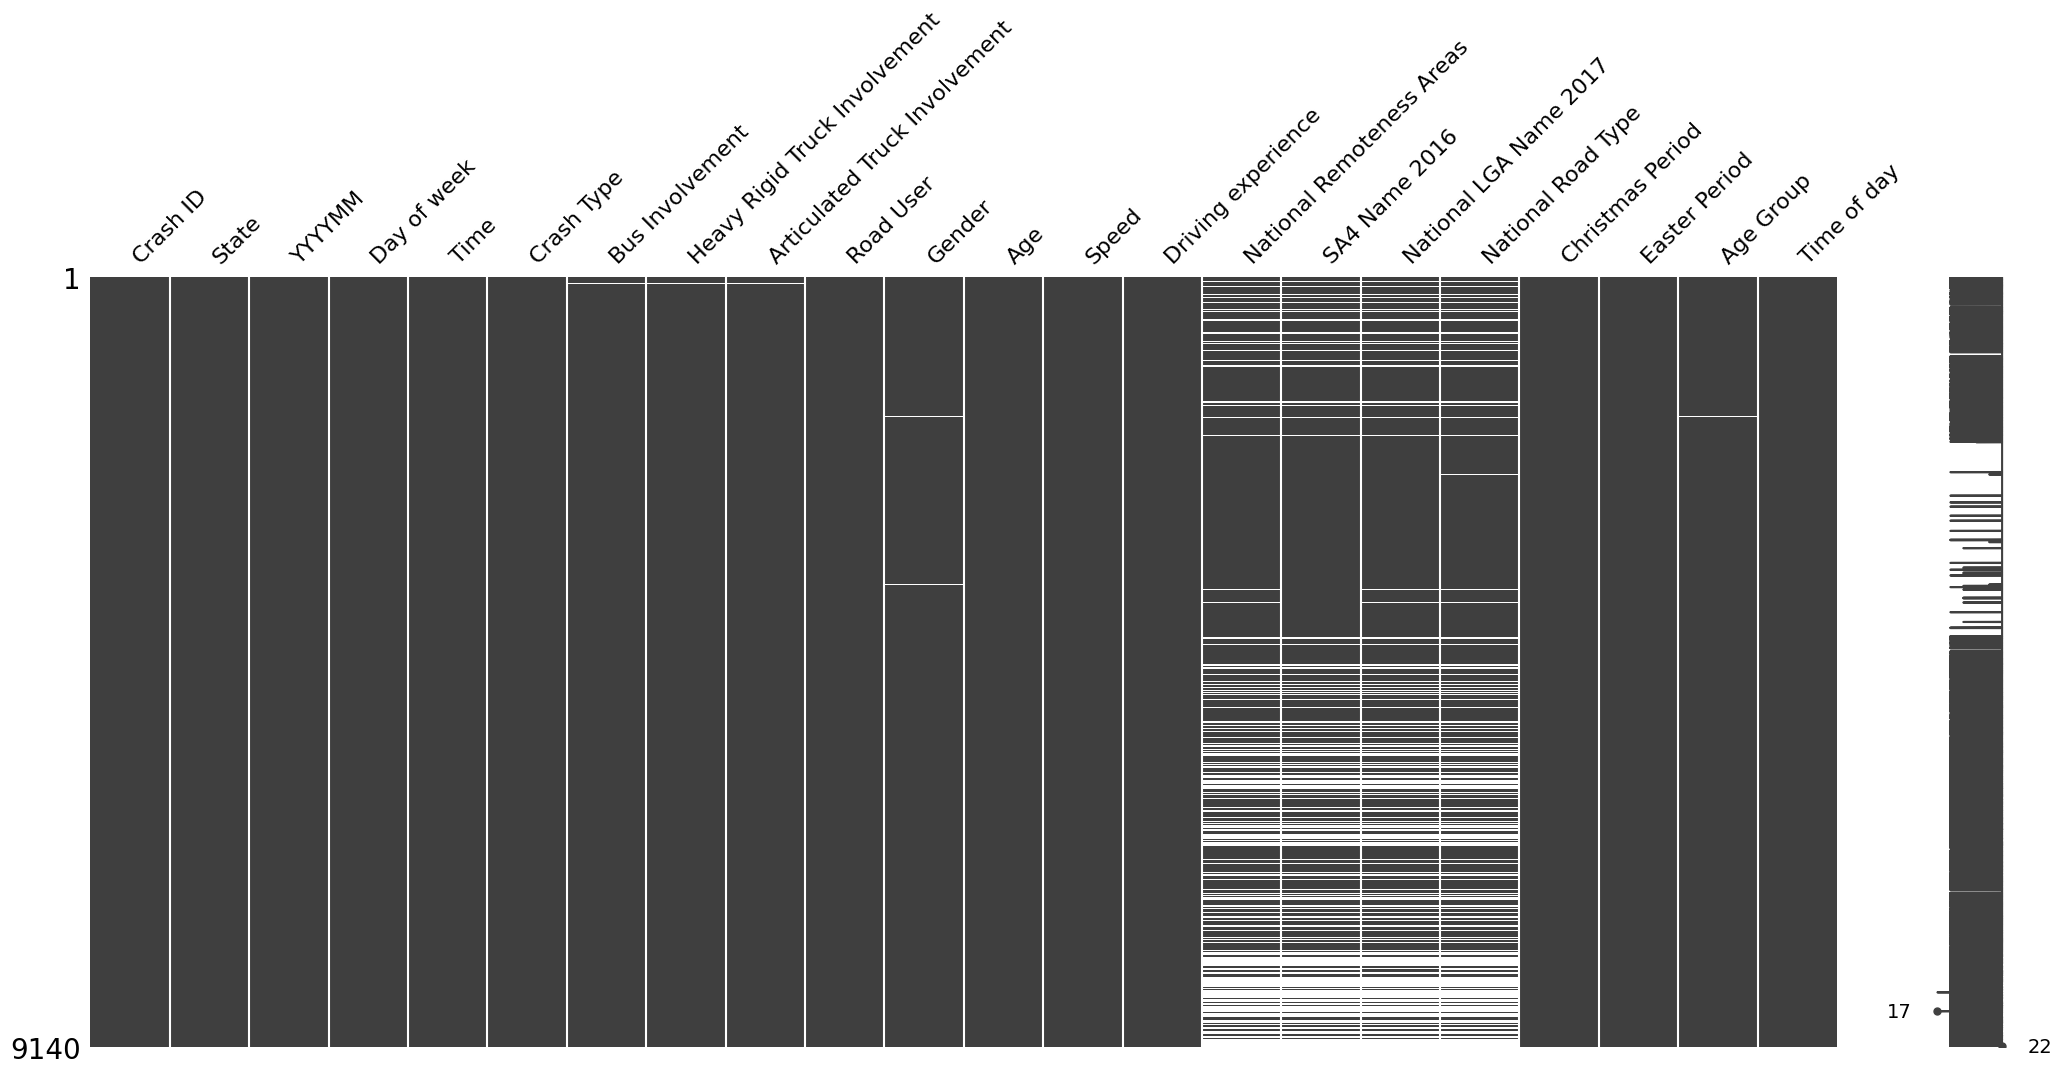

In [155]:
# Using missingno to present the data integrity

missingno.matrix(df)

We can notice National Remoteness Areas, SA4 Name 2016, National LGA Name 2017 and  National Road Type have a lot of missing data

### 1. How many rows contain missing values

In [156]:
# Create new dataframe without missing data

null_data = df[df.isna().any(axis=1)]

# Calculate the sum of rows which contain missing data

len(null_data)


2287

 There are **2287** rows with missing values

### 2. List the months with no missing values in them

In [157]:
# Using to_datetime to get the month from YYYYMM and create the column called month

null_data['Month'] = pd.to_datetime(null_data['YYYYMM'].astype(str), format='%Y%m').dt.month

# Using unique() to get the unique month from Month list

null_data['Month'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64)

**All months** have missing values

### 3. Remove the records with missing values.


In [158]:
# Using dropNA() to get a data frame without NA values

df_nona = df.dropna()
df_nona

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


### 4. Remove duplicates after removing the missing values

In [159]:
#Using drop_duplicates() to remove duplicates

df_nona = df_nona.drop_duplicates()

# Prepare data frame for next section

df = df_nona
df_nona

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


Successfully drop **16 rows** which are duplicated

## Task 4. Number of crashes in each month

In [160]:
# get the month from YYYYMM

df['Month'] = pd.to_datetime(df['YYYYMM'].astype(str), format='%Y%m').dt.month

# Using count() and groupby month to get the number of crashes in each month

df.groupby(['Month'])['Crash ID'].count()

Month
1     593
2     518
3     655
4     575
5     555
6     559
7     598
8     640
9     531
10    531
11    517
12    565
Name: Crash ID, dtype: int64

We can notice August and March have the highest number of crashes

## Task 5.  Investigating crashes over different months for specific road user

### 1. Compute the average number of crashes against Month for car drivers

In [161]:
# Get the year from YYYYMM

df['Year'] = pd.to_datetime(df['YYYYMM'].astype(str), format='%Y%m').dt.year

# Group by year and month and counting the number of crash

df2 = df.groupby(['Month','Year','Road User']).agg({'Crash ID':'count'}).reset_index()

# Rename the columns

df2.rename(
    columns={"Crash ID":"Number of deaths"},
    inplace = True
)
df2

,Month,Year,Road User,Number of deaths
0,1,2014,Car driver,7
1,1,2014,Car passenger,3
2,1,2014,Motorcycle rider,4
3,1,2014,Pedestrian,3
4,1,2015,Car driver,41
...,...,...,...,...
491,12,2020,Car passenger,17
492,12,2020,Motorcycle pillion Car passenger,1
493,12,2020,Motorcycle rider,10
494,12,2020,Pedal cyclist,2


Then we can calculate the average number of crashes over different years, categories in different road user

In [162]:
# Calculate the average number of crashes against Month

df2_1 = df2.groupby(['Road User','Month']).agg({'Number of deaths':'mean'}).reset_index()
df2_1

,Road User,Month,Number of deaths
0,Car driver,1,34.375000
1,Car driver,2,28.875000
2,Car driver,3,39.375000
3,Car driver,4,33.375000
4,Car driver,5,32.875000
...,...,...,...
77,Pedestrian,8,11.000000
78,Pedestrian,9,6.625000
79,Pedestrian,10,8.142857
80,Pedestrian,11,9.285714


### 2&3.Draw chart showing the average number of crashes over different months

#### Line plot of average number of death in car driver category

Text(0.5, 1.0, 'Car driver - Average number of deaths for each month')

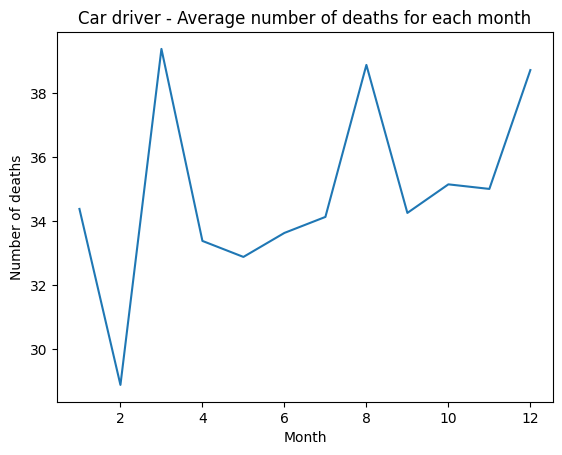

In [163]:
# Extract car drivers data

df_car_driver = df2_1[(df2_1["Road User"] == 'Car driver')]

# Draw plot
sns.lineplot( x=df_car_driver["Month"],y=df_car_driver["Number of deaths"])

# Set title

plt.title("Car driver - Average number of deaths for each month")

We can notice that:
- February have the lowest average number of crashes
- March, August and December have high average number of crashes
- The total trend is low to high from February to December

#### Line plot of average number of death in all categories

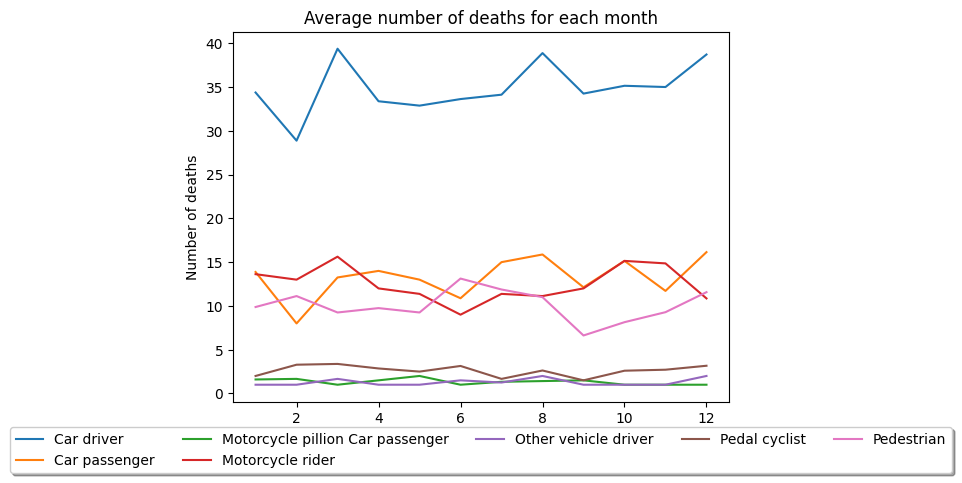

In [164]:
# Compare Car drivers' index with other categories

sns.lineplot( x=df2_1["Month"],y=df2_1["Number of deaths"],hue=df2_1["Road User"])

# Make title

plt.title("Average number of deaths for each month")

# Change location of legend

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

Extra information:
- Car driver reported the most number of deaths, which is 2 times higher than the other categories (Around 30-40)
- Motorcycle rider, Pedestrian and car passenger have similar death rates which is around 10-15 in each month
- Motorcycle pillion car passenger, other vehicle driver and pedal cyclist show the low and similar death average which is around 0-5

## Task 6.  Exploring Speed, National Road Type, and Age

### 1. Draw a chart showing the average speed against National Road Type for car drivers

Text(0.5, 1.0, 'Average speed against National Road Type for car drivers')

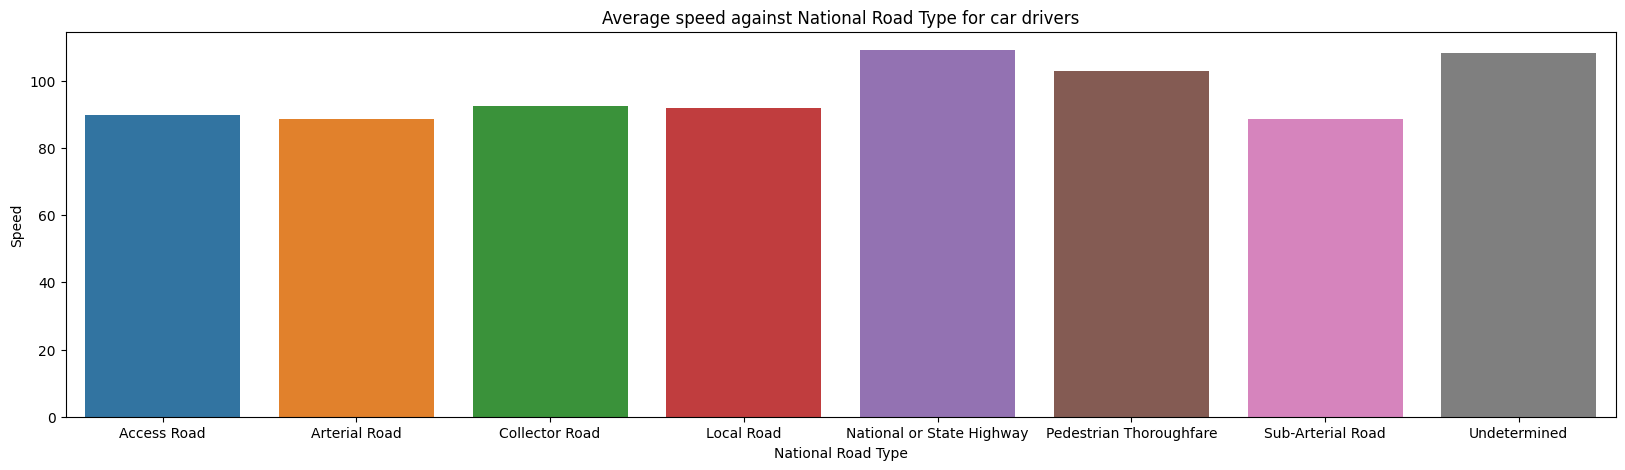

In [165]:
# Filter car driver

df_car_driver = df[(df["Road User"] == 'Car driver')]

# Setting the size of graph

plt.figure(figsize = (20,5))

# Draw plot

sns.barplot(data=df_car_driver.groupby(['National Road Type']).agg({'Speed':'mean'}).reset_index(), x="National Road Type", y="Speed")

# Setting title

plt.title("Average speed against National Road Type for car drivers")

We can notice:
- National or state highway and undetermined road have highest average of speed in Car drivers

### 2. Counter-intuitive values in Age column. 

We notice some age information is smaller than 0, we replace them with 0

In [166]:
# Print data with age smaller than 0

df[(df["Age"] < 0)]

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month,Year
40,20213187,Qld,202109,Wednesday,7:00:00,Multiple,No,Yes,Yes,Car driver,...,Major Cities of Australia,Brisbane - North,Brisbane (C),Sub-Arterial Road,No,No,40_to_64,Day,9,2021
90,20216009,Tas,202108,Sunday,1:30:00,Multiple,No,No,No,Car driver,...,Outer Regional Australia,South East,Derwent Valley (M),Arterial Road,No,No,40_to_64,Night,8,2021
5204,20171014,NSW,201704,Wednesday,15:38:00,Single,No,Yes,No,Pedestrian,...,Major Cities of Australia,Central Coast,Central Coast,Collector Road,No,No,0_to_16,Day,4,2017
7702,20151052,NSW,201504,Wednesday,15:20:00,Single,No,No,Yes,Pedestrian,...,Major Cities of Australia,Sydney - Ryde,Parramatta,Arterial Road,No,No,65_to_74,Day,4,2015


In [167]:
# Replace incorrect age values with 0

df.loc[(df["Age"] < 0),'Age'] = 0

Now in data frame there are no age smaller than 0

## Task 7.Relationship between Age, Speed, and Driving Experiences

### 1. Compute pairwise correlation of columns

We can making a new data frame with vehicle driver only, and calculate the correlation between age speed and driving experience

Text(0.5, 1.0, 'Correlation heatmap of Speed, Driver experience and Age')

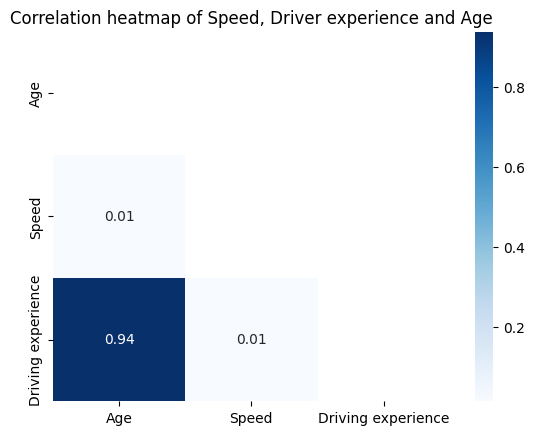

In [168]:
# Prepare data frame

df_corr_vehicle_driver = pd.DataFrame(df[(df["Road User"] == 'Car driver') |
                                         (df["Road User"] == 'Motorcycle rider') |
                                         (df["Road User"] == 'Other vehicle driver')],
                                         columns=["Road User" , "Age" ,"Speed", "Driving experience" ]).corr()

# Draw correlation heatmap of vehicle driver

sns.heatmap(df_corr_vehicle_driver,cmap="Blues",
            annot=True,
            fmt='.2f',
            mask=np.triu(df_corr_vehicle_driver))

# Setting title

plt.title("Correlation heatmap of Speed, Driver experience and Age")

Driving experience and age have the highest linear association

### 2. Calculate the relationship between the number of crashes and Driving Experiences

In [183]:
# Prepare data frame

df7_2 = pd.DataFrame(df[(df["Road User"] == 'Car driver') |
                    (df["Road User"] == 'Motorcycle rider') |
                    (df["Road User"] == 'Other vehicle driver')],
                    columns=["Road User" , "Age" ,"Speed", "Driving experience", "Crash ID" ])
df7_2 = df7_2.groupby(['Driving experience','Road User']).agg({'Crash ID':'count'}).reset_index()
df7_2.rename(
    columns={"Crash ID":"Number of deaths"},
    inplace = True
)
df7_2

,Driving experience,Road User,Number of deaths
0,1,Car driver,30
1,1,Motorcycle rider,13
2,2,Car driver,93
3,2,Motorcycle rider,24
4,2,Other vehicle driver,2
...,...,...,...
64,64,Car driver,13
65,64,Other vehicle driver,2
66,65,Car driver,5
67,65,Motorcycle rider,1


Text(0.5, 1.0, 'Total vehicle driver')

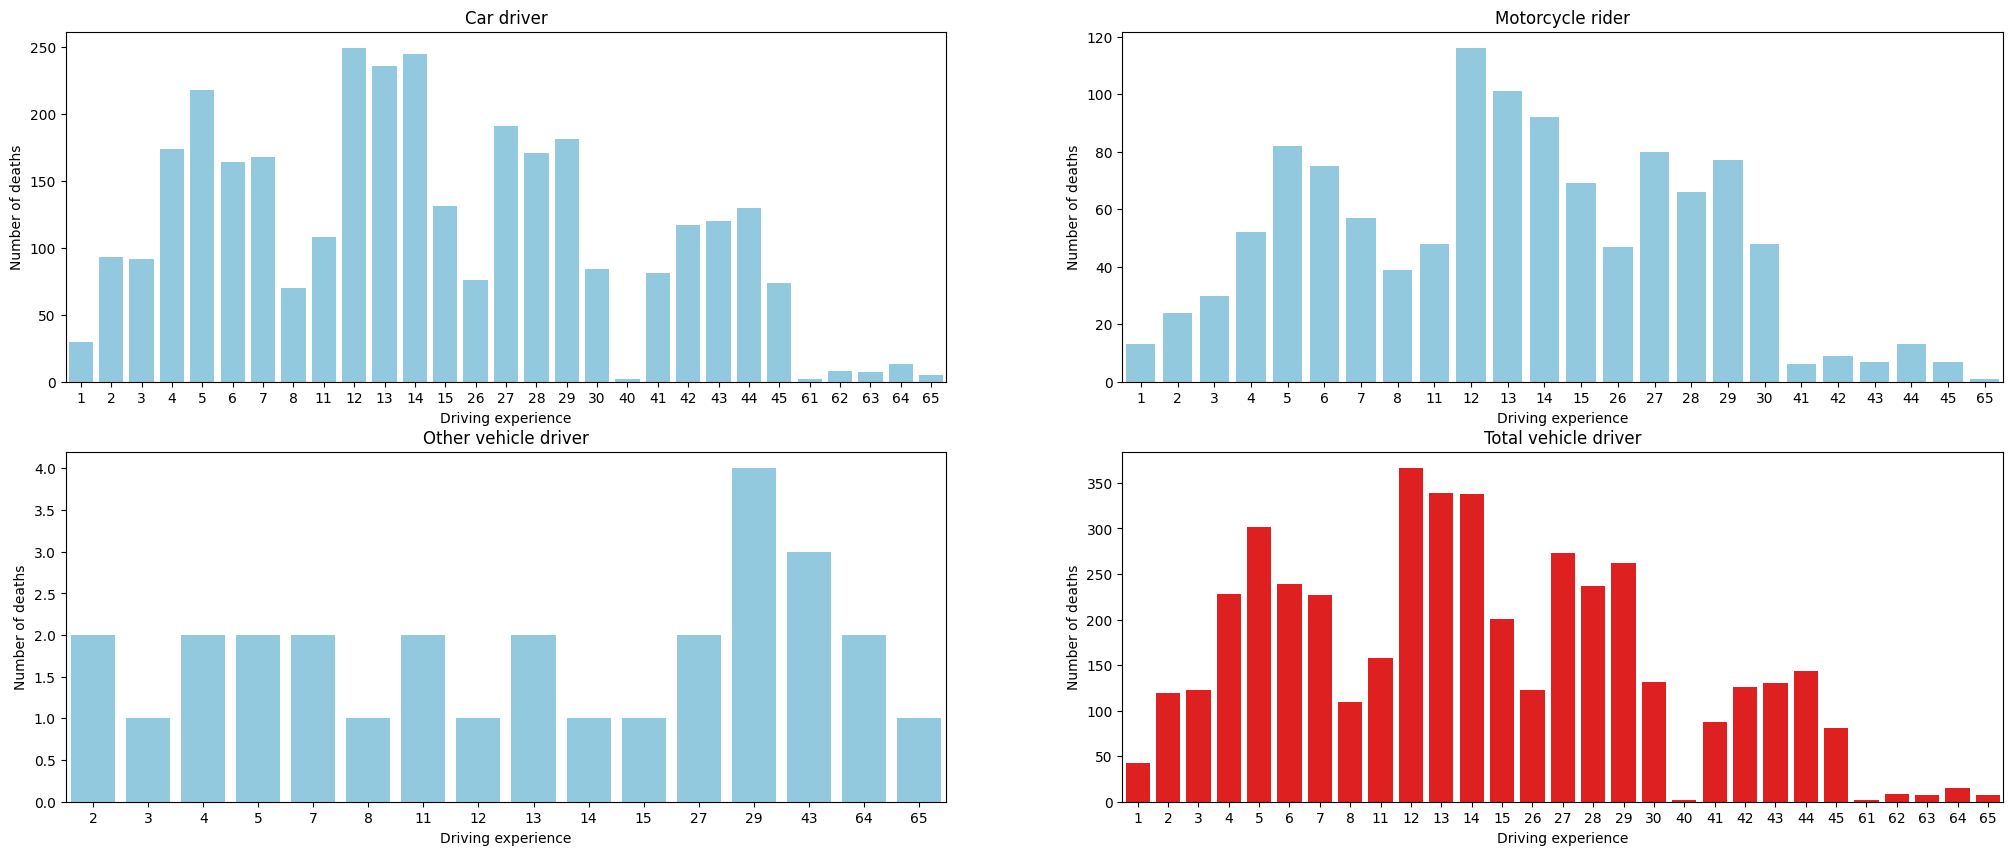

In [198]:
# Set up figure

fig, axs = plt.subplots(2,2, figsize=(25,10))

# Draw graph

# Car driver
sns.barplot(data=df7_2[df7_2["Road User"] == 'Car driver'],
            x="Driving experience",
            y= 'Number of deaths',
            color="skyblue",
            ax=axs[0,0]).set_title("Car driver")

# Motorcycle rider
sns.barplot(data=df7_2[df7_2["Road User"] == 'Motorcycle rider'],
            x="Driving experience",
            y= 'Number of deaths',
            color="skyblue",
            ax=axs[0,1]).set_title("Motorcycle rider")

# Other vehicle driver
sns.barplot(data=df7_2[df7_2["Road User"] == 'Other vehicle driver'],
            x="Driving experience",
            y= 'Number of deaths',
            color="skyblue",
            ax=axs[1,0]).set_title("Other vehicle driver")

# Total vehicle driver
sns.barplot(data=df7_2.groupby("Driving experience").agg({'Number of deaths':'sum'}).reset_index(),
            x="Driving experience",
            y= 'Number of deaths',
            color="Red",
            ax=axs[1,1]).set_title("Total vehicle driver")

Base on the Graph we can notice:
- For car, most crashes are happened with experience about 12-14 years, and 5 years, 27-29 years also have a slightly higher range than other
- For Motorcycle, highest range is 12 years experience
- For others, 29 years have a higher range than other
- In general, based on total vehicle chart, we can notice 12-14 years experience have a highest chance of crashes, and 4-7 years experience and 27-29 years experience have second highest chance of crashes, but after that there are also between 41-45 years experience have a higher chance of crashes.

## Task 8. Investigating yearly trend of crash

### 1&2.Linear regression

The R-Squared value is 0.1904499588287046


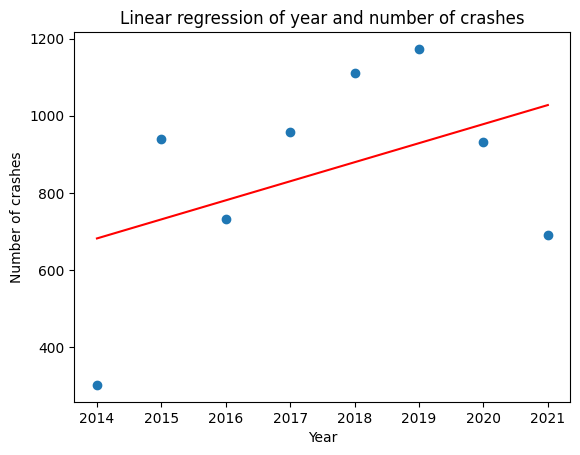

In [ ]:
# Setting
linear_regression = LinearRegression()

# Prepare dataframe for linear regression

df3 = df.groupby(['Year']).agg({'Crash ID':'count'}).reset_index()
X = df3.iloc[:, 0].values.reshape(-1, 1)
Y = df3.iloc[:, 1].values.reshape(-1, 1)
slope, intercept, r_value, p_value, std_err = linregress(df3['Year'],df3['Crash ID'])

linear_regression.fit(X, Y)
Y_pred = linear_regression.predict(X)

# Draw chart

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

# Setting title and labels

plt.title("Linear regression of year and number of crashes")
plt.xlabel('Year')
plt.ylabel('Number of crashes')

# Print out the r-squared value

print('The R-Squared value is '+str(r_value**2))

In [ ]:
# Using the slope and intercept to calculate the the number of crushed in 2022

slope*2022+intercept

1076.892857142855

We can predict there will have 1077 numbers of crashes in 2022 based on the linear regression model

### 3&4.Polynomial regression

The new model is polynomial regression, and we can compare with it with the linear regression model with the R-Squared values

The R-Squared value is 0.7761331527308267


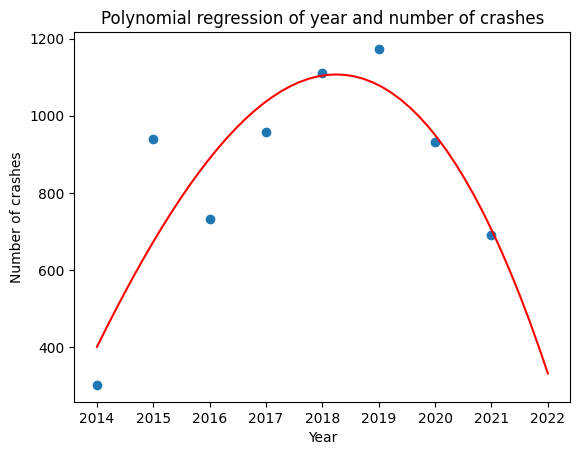

In [ ]:
# Prepare dataframe for linear regression

X = df3[("Year")].tolist()
Y = df3[("Crash ID")].tolist()
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(2014,2022)

# Draw chart

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline), color='red')

# Setting title and labels

plt.title("Polynomial regression of year and number of crashes")
plt.xlabel('Year')
plt.ylabel('Number of crashes')

# Print out the r-squared value

print('The R-Squared value is '+ str(metrics.r2_score(Y, mymodel(X))))


We can notice the new model has a **better R squared value** than the linear model one **(0.77 > 0.19)**

Therefore the new model is better.

In [ ]:
# Using the polynomial model to predict the number of crashes in 2022

mymodel(2022)

331.7857894897461

Base on the polynomial Model, there are about **332 cases** of crashes in 2022

## Task 9. Filling in missing values with better approach

In [ ]:
# Prepare the data frame

df9 = df_nona

In the age section we can use boxplot to find the outliers of each age group and replace the outliers with the mean values

Text(0, 0.5, 'Age')

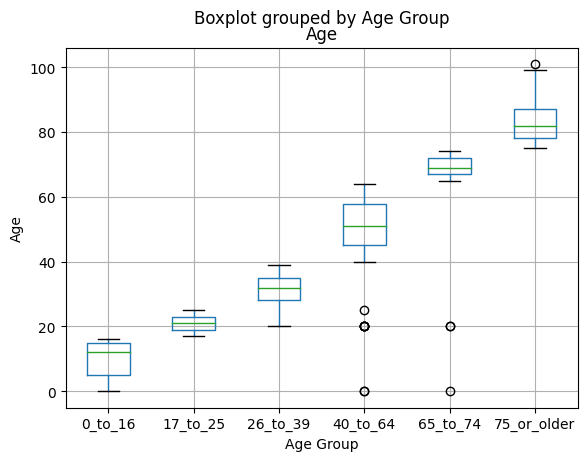

In [ ]:
# Visualising box plot

bp = df9.boxplot(by ='Age Group', column =['Age'], grid = True)
plt.ylabel('Age')

Then we can replace the outliers with median based on the graph.

<AxesSubplot:title={'center':'Age'}, xlabel='Age Group'>

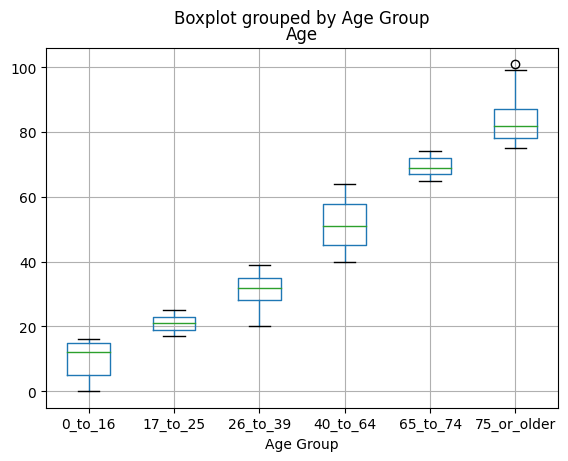

In [ ]:
# Calculate the median of each age group

median_40_to_64 = df9.loc[(df9["Age Group"]=='40_to_64')&(df9['Age']>=40), 'Age'].median()
median_65_to_74 = df9.loc[(df9["Age Group"]=='65_to_74')&(df9['Age']>=65), 'Age'].median()

# Replace the outliers with the median

df9.loc[(df9["Age Group"]=='40_to_64')&(df9['Age']<40), "Age"] = median_40_to_64
df9.loc[(df9["Age Group"]=='65_to_74')&(df9['Age']<65), "Age"] = median_65_to_74

# Represent the plot to visualise the results
df9.boxplot(by ='Age Group', column =['Age'], grid = True)

Now the counter-intuitive value of age gone with the help of model, we can also use the same method on other columns.

#  Part B

## Task 1. Classification

In [ ]:
# Read data

dataset = pd.read_csv("song_data.csv")

# Drop NA data and duplicate data

dataset.dropna()
dataset.drop_duplicates()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,4,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,4,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,4,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,4,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,3,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,3,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,3,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),2,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,3,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


We will firstly ignore the song name column, because it is not numeric value <br>
<br>
And we can create a correlation chart for the song features

Text(0.5, 1.0, 'Correlation heatmap of Song')

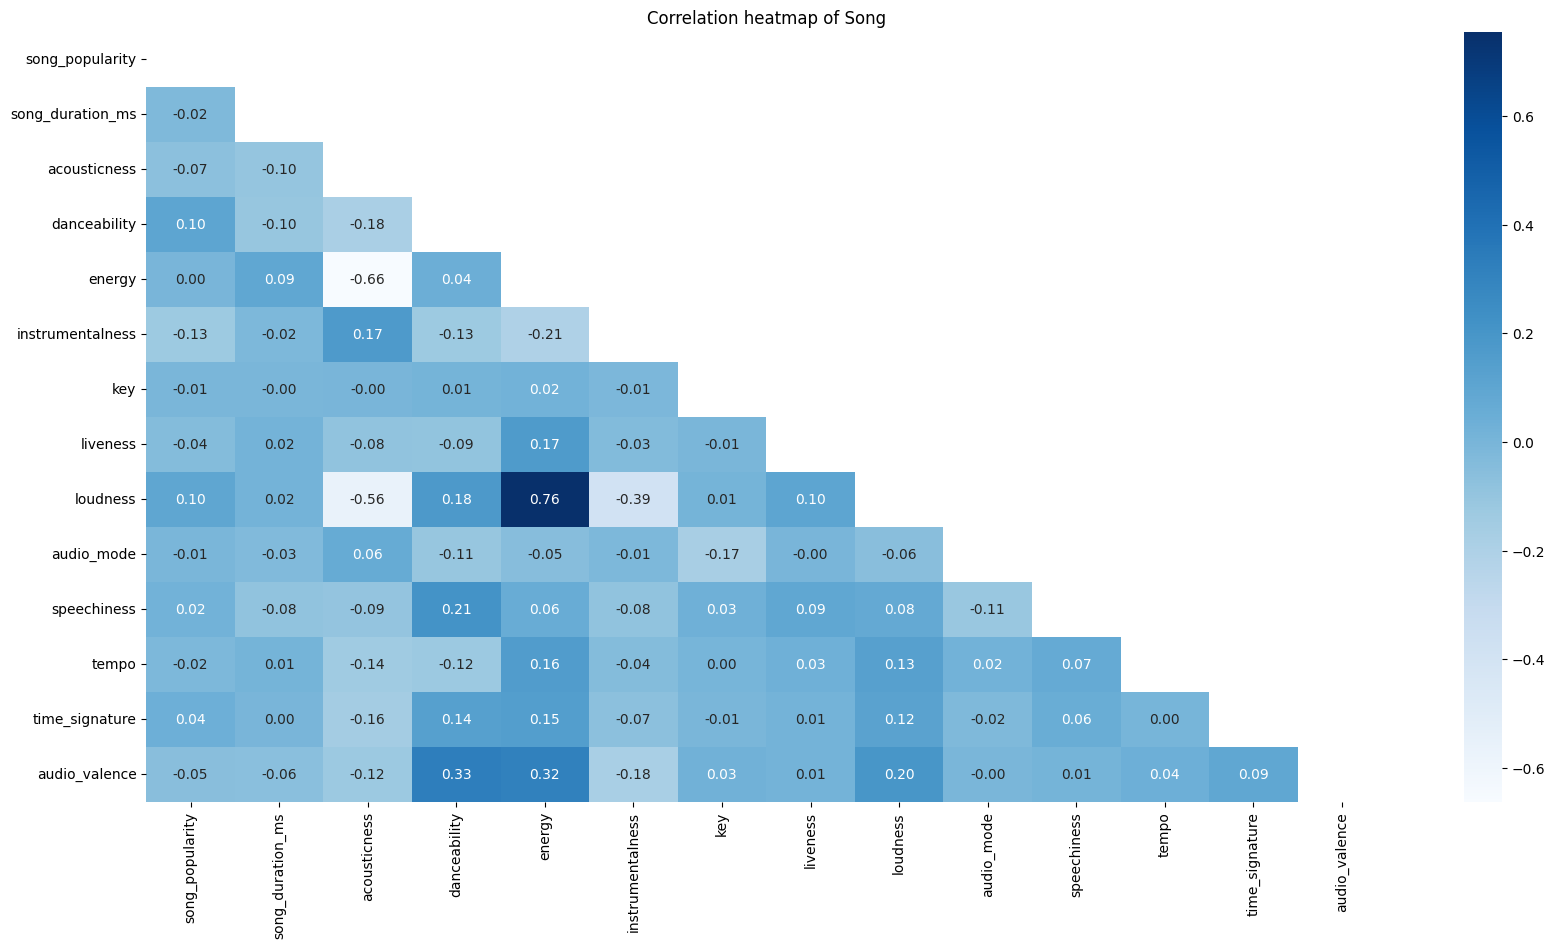

In [ ]:
# Making dataframe of song

df_corr_song = pd.DataFrame(dataset).corr()

# Draw correlation heatmap of dataframe

plt.figure(figsize = (20,10))
sns.heatmap(df_corr_song,cmap="Blues",
            annot=True,
            fmt='.2f',
            mask=np.triu(df_corr_song))

# Setting title

plt.title("Correlation heatmap of Song")

We can notice:
- The population of song have positive relationship with the time_signature, speechiness, loudness and dancebility
- And negative with other
- We can choose the features that are having value >= 0.05 to make the classification

In [ ]:
# Separate the data into depending variables and independent variables

X = dataset.iloc[:, [3,4,6,9,14]].values
y = dataset.iloc[:, 1].values

# And we separate the data into two group one for testing and one for training

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0
)

# Feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Develop tree

classifier = DecisionTreeClassifier(
    criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Confusion Matrix

After we create the classifier, we can make a confusion matrix of it and calculate the accuracy

In [ ]:
# Create the confusion matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,  77, 158, 123,  13],
       [ 73, 214, 218, 204,  23],
       [146, 245, 748, 412,  40],
       [108, 139, 309, 920,  42],
       [  4,  10,  11,  19, 353]], dtype=int64)

Text(0.5, 1.0, 'The total Confusion matrix of the classifier')

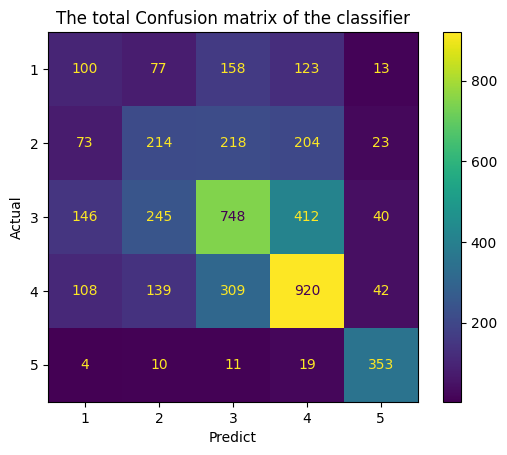

In [ ]:
# Display confusion_matrix

metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels=['1','2','3','4','5']).plot()

# Plot confusion_matrix

plt.ylabel('Actual')
plt.xlabel('Predict')
plt.title('The total Confusion matrix of the classifier')

In [ ]:
# Print the report of Classification

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.23      0.21      0.22       471
           2       0.31      0.29      0.30       732
           3       0.52      0.47      0.49      1591
           4       0.55      0.61      0.58      1518
           5       0.75      0.89      0.81       397

    accuracy                           0.50      4709
   macro avg       0.47      0.49      0.48      4709
weighted avg       0.49      0.50      0.49      4709



Highlight:
- **accuracy is 0.5** which means the classifier accuracy is not good enough
- From Level 1 to Level 5, their Precision and Recall range are both from low to high
- The Precision of level 5 is highest (0.75) and level 3 and 4 is around 0.5. 
- The recall of level 5 is highest (0.89). This means the classifier is good at predict the popular song.
- The level 5 has high f1-score which means its accuracy and recall are balanced
- **If the song more popular, then the classifier output is more reliable**

## Task 2. Clustering

Dataframe link:
https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?resource=download&select=segmentation+data.csv



Dataframe link from Monash google drive: https://drive.google.com/file/d/1VMzheag5P5iOeq-TZl6KnT-9N941pu3X/view?usp=sharing

In [ ]:
# Read dataframe

customer_df = pd.read_csv('segmentation data.csv')

# Drop duplicate and NA

customer_df.drop_duplicates()
customer_df.dropna()
customer_df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Applying Kmeans to Age and Income

Text(0.5, 1.0, 'Income distribution with age')

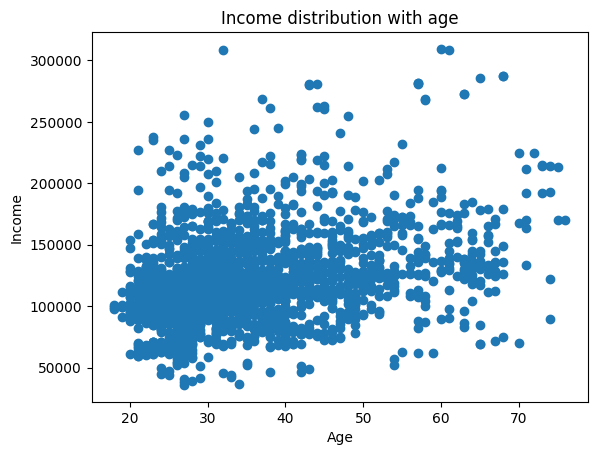

In [ ]:
# Visualising the normal scatter plot with customer_df

plt.scatter(x=customer_df['Age'],y=customer_df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income distribution with age')

Base on observe, there are no outliers inside the data frame, so we can skip to the next step

#### K = 2

Text(0.5, 1.0, '(K = 2) Income distribution with age')

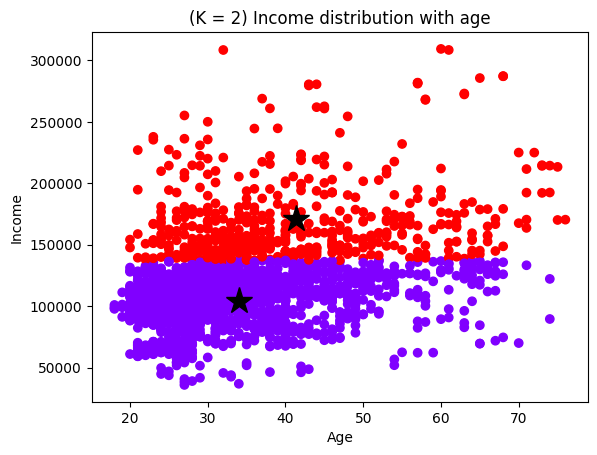

In [ ]:
kmeans = KMeans(n_clusters=2).fit(
        customer_df[['Age','Income']])

# Visualise the output labels

colormap = np.array(['r','g','b'])
plt.scatter(
    x=customer_df['Age'],
    y=customer_df['Income'],
    c=kmeans.labels_,
    cmap = 'rainbow')

# Visualise the cluster centers (black stars)

plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('(K = 2) Income distribution with age')

We can see that it is divided into two parts, and the dividing line is like a horizontal straight line, and the divided income range is close to 140,000

#### K = 4

Text(0.5, 1.0, '(K = 4) Income distribution with age')

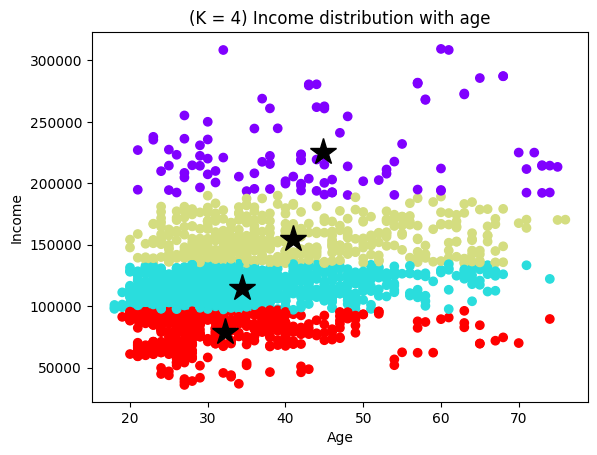

In [ ]:
kmeans = KMeans(n_clusters=4).fit(
        customer_df[['Age','Income']])

# Visualise the output labels

colormap = np.array(['r','g','b'])
plt.scatter(
    x=customer_df['Age'],
    y=customer_df['Income'],
    c=kmeans.labels_,
    cmap = 'rainbow')

# Visualise the cluster centers (black stars)

plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('(K = 4) Income distribution with age')



We can notice the whole graph separate 4 part horizontally. 
- The first part: 0 to Around 100000
- The second part: 100000 to Around 140000
- The first part: 140000 to Around 180000
- The first part: 180000 to Around 300000+


#### k = 8

Text(0.5, 1.0, '(K = 8) Income distribution with age')

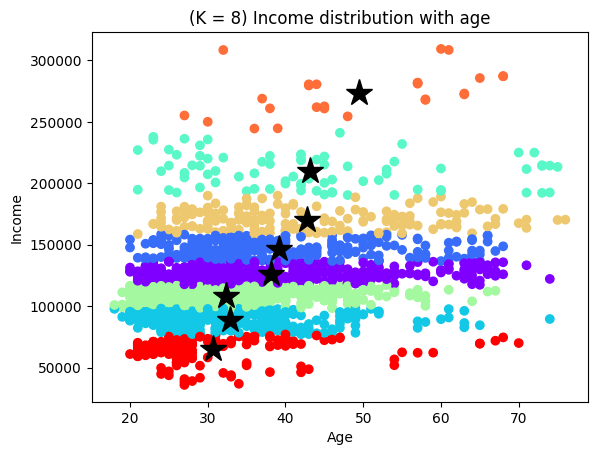

In [ ]:
kmeans = KMeans(n_clusters=8).fit(
        customer_df[['Age','Income']])

# Visualise the output labels

colormap = np.array(['r','g','b'])
plt.scatter(
    x=customer_df['Age'],
    y=customer_df['Income'],
    c=kmeans.labels_,
    cmap = 'rainbow')

# Visualise the cluster centers (black stars)

plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('(K = 8) Income distribution with age')

We can notice:
- The top cluster centroids owned the lowest number of data points, and it is far away from the rest of the cluster centroids
- The rest of the cluster centroids are highly concentrate in the middle around 50000-220000